<a href="https://colab.research.google.com/github/YanwenLai/forTAClass/blob/main/111506022_%E6%97%A5%E6%96%87%E4%BA%8C_%E9%99%B3%E8%93%89%E8%90%B1_%E6%97%A5%E8%AA%9E%E3%81%A6%E5%BD%A2%E8%84%AB%E9%80%83%E9%81%8A%E6%88%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1.專案說明
期中做了貓狗搶食物大戰的遊戲，透過玩家與電腦猜拳，猜贏先移動到目標的一方獲勝。

期末想利用在系上所學到的日語動詞變化，結合期中的棋盤遊戲，進行改編且能達到學習效果。（圖為期中專案）

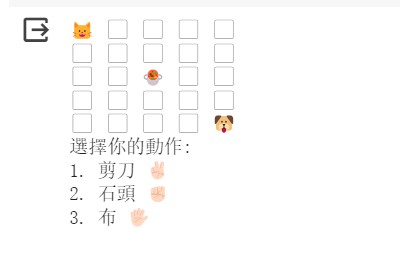

###2.日語的て形
動詞て形主要的功能是連接句子與句子，以及動詞與動詞。

以下是動詞原形變化至動詞て形的規則



1.一類動詞

‧ 字尾為す的動詞：將最後的字母發音由u換成i，加上て

 ex:貸す kasu→貸て kashite

‧ 字尾為く、ぐ的動詞：將最後的字母發音由u換成i，加上て、で

 ex:書く　kaku→書いて kaite，泳ぐ　oyogu→泳いで oyoide

‧ 字尾為う、つ、る的動詞：加上促音っ後，再加上て

 ex:買う　kau→買って katte，待つ　matsu→待って matte，切る　kiru→切って kitte

‧ 字尾為ぶ、ぬ、む的動詞：將ぶ、ぬ、む改為んで

 ex:飛ぶ　tobu→飛んで tonde，読む　yomu→読んで yonde，死ぬ　shinu→死んで shinde

2.二類動詞

‧ 將動詞字尾的る換成て

 ex:食べる　taberu→食べて tabete，見る　miru→見て mite

3.不規則動詞

‧ する換成して，比較特別的：来る→来て

 ex:勉強する benkyousuru→勉強して benkyoushite

###3.遊戲說明

跟期中專案不一樣的是，玩家與電腦的目標並不一致，玩家須答對問題往終點前進，電腦則是在玩家答錯時向玩家靠近。

1.回答て形變化的問題

2.答對可以靠近終點一步

3.答錯時鯊魚會靠近

4.成功答對問題抵達終點則遊戲獲勝，答錯問題被鯊魚吃掉則遊戲失敗

輸入常用套件

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import random

#輸入動詞和對應的て形
verbs_te_form = {
    "立つ":"立って",
    "送る":"送って",
    "帰る":"帰って",
    "泳ぐ":"泳いで",
    "読む":"読んで",
    "住む":"住んで",
    "死ぬ":"死んで",
    "開ける":"開けて",
    "忘れる":"忘れて",
    "始める":"始めて",
    "遊ぶ":"遊んで",
    "飛ぶ":"飛んで",
    "待つ":"待って",
    "言う":"言って",
    "引く":"引いて",
    "出す":"出して",
    "貸す":"貸して",
    "書く":"書いて",
    "食べる": "食べて",
    "行く": "行って",
    "見る": "見て",
    "勉強する": "勉強して",
    "来る": "来て",
}

#印出遊戲板，顯示玩家、電腦與終點的位置，使用for迴圈
def print_board(player, computer, goal):
    for i in range(5):
        for j in range(5):
            if (i, j) == player:
                print("👦", end=" ")
            elif (i, j) == computer:
                print("🦈", end=" ")
            elif (i, j) == goal:
                print("🏁", end=" ")
            else:
                print("⬜", end=" ")
        print()

#根據當前位置和目標位置，決定下一步的移動方向，使得玩家向終點移動，電腦向玩家移動。
def move_towards(player, target):
    if player[0] < target[0]:
        return (player[0] + 1, player[1])
    elif player[0] > target[0]:
        return (player[0] - 1, player[1])
    elif player[1] < target[1]:
        return (player[0], player[1] + 1)
    elif player[1] > target[1]:
        return (player[0], player[1] - 1)
    else:
        return player

def practice_te_form():
    #隨機選一個動詞
    verb, te_form = random.choice(list(verbs_te_form.items()))

    #提示玩家輸入
    user_input = input(f"請將動詞 '{verb}' 轉換成て型：")

    #檢查答案是否正確
    if user_input == te_form:
        print("恭喜你，答對了！")
        return True
    else:
        print(f"答錯了，正確答案是 '{te_form}'。")
        return False

#執行遊戲
def play_game():
    player = (0, 0)  #左上角
    computer = (4, 0)  #左下角
    goal = (2, 4)  #離兩邊一樣遠的地方

    print("歡迎來到日文動詞て形逃脫遊戲！")
    print("答對問題可以向終點前進，答錯則會有鯊魚靠近，如果被鯊魚吃掉則遊戲結束。")

    while player != goal and player != computer:
        print_board(player, computer, goal)

        result = practice_te_form()

        if result:
            player = move_towards(player, goal)
            print("恭喜，你成功前進一步！")
        else:
            computer = move_towards(computer, player)
            print("答錯了，注意鯊魚靠近！")

    print_board(player, computer, goal)

    if player == goal:
        print("恭喜，你成功抵達了終點！")
    else:
        print("糟糕，你被鯊魚吃掉了，遊戲結束！")

if __name__ == "__main__":
    play_game()


歡迎來到日文動詞て形逃脫遊戲！
答對問題可以向終點前進，答錯則會有鯊魚靠近，如果被鯊魚吃掉則遊戲結束。
👦 ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ 🏁 
⬜ ⬜ ⬜ ⬜ ⬜ 
🦈 ⬜ ⬜ ⬜ ⬜ 
請將動詞 '開ける' 轉換成て型：開けて
恭喜你，答對了！
恭喜，你成功前進一步！
⬜ ⬜ ⬜ ⬜ ⬜ 
👦 ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ 🏁 
⬜ ⬜ ⬜ ⬜ ⬜ 
🦈 ⬜ ⬜ ⬜ ⬜ 
請將動詞 '来る' 轉換成て型：来て
恭喜你，答對了！
恭喜，你成功前進一步！
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
👦 ⬜ ⬜ ⬜ 🏁 
⬜ ⬜ ⬜ ⬜ ⬜ 
🦈 ⬜ ⬜ ⬜ ⬜ 
請將動詞 '読む' 轉換成て型：読んで
恭喜你，答對了！
恭喜，你成功前進一步！
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ 👦 ⬜ ⬜ 🏁 
⬜ ⬜ ⬜ ⬜ ⬜ 
🦈 ⬜ ⬜ ⬜ ⬜ 
請將動詞 '遊ぶ' 轉換成て型：遊んで
恭喜你，答對了！
恭喜，你成功前進一步！
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ 👦 ⬜ 🏁 
⬜ ⬜ ⬜ ⬜ ⬜ 
🦈 ⬜ ⬜ ⬜ ⬜ 
請將動詞 '来る' 轉換成て型：来て
恭喜你，答對了！
恭喜，你成功前進一步！
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ 👦 🏁 
⬜ ⬜ ⬜ ⬜ ⬜ 
🦈 ⬜ ⬜ ⬜ ⬜ 
請將動詞 '送る' 轉換成て型：送って
恭喜你，答對了！
恭喜，你成功前進一步！
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ ⬜ 
⬜ ⬜ ⬜ ⬜ 👦 
⬜ ⬜ ⬜ ⬜ ⬜ 
🦈 ⬜ ⬜ ⬜ ⬜ 
恭喜，你成功抵達了終點！
